In [ ]:
!pip install mne
import mne
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='/content/drive/MyDrive/BCICIV_2a_gdf/A06T.gdf'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

raw=mne.io.read_raw_gdf(file, preload=True, stim_channel='auto', verbose=False)
# Filter settings
low_cut = 4
hi_cut  = 40

raw_filt = raw.copy().filter(low_cut, hi_cut)
#raw.filter(4,40.,fir_design='firwin')
#raw.plot_psd(area_mode='range', tmax=10.0,average=False)
rawdata = raw_filt.get_data()
print(rawdata.shape)
events, event_id = mne.events_from_annotations(raw_filt)
print(events.shape[0])
allLeftData = []
allRightData = []
allFootData = []
allTongueData = []
for i in range(events.shape[0]-1):
  if(events[i,2] == 7):
    leftData = rawdata[:,events[i,0]+125:events[i,0]+1125] 
    allLeftData.append(leftData)
  if(events[i,2] == 8):
    rightData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allRightData.append(rightData)
  if(events[i,2] == 9):
    footData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allFootData.append(footData)
  if(events[i,2] == 10):
    tongueData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allTongueData.append(tongueData)
print(len(allLeftData))
print(len(allRightData))
print(len(allFootData))
print(len(allTongueData))
allLeftData = np.array(allLeftData) # creates an array 
allRightData = np.array(allRightData)
allFootData = np.array(allFootData)
allTongueData = np.array(allTongueData)
allLeftData = allLeftData[:71,:22,:] #creating a matrix with 71 rows, 22 columns and 600 depth. 600 is the window size 
allRightData = allRightData[:71,:22,:]
allFootData = allFootData[:71,:22,:]
allTongueData = allTongueData[:71,:22,:]
print(allLeftData.shape)
print(allRightData.shape)
print(allFootData.shape)
print(allTongueData.shape)

def standardlizeSig(data):
  base = np.mean(data)
  std = np.std(data)
  standardlized_data = (data-base)/std
  del base, std
  return standardlized_data
# def standardlizeSig(data):
#   minft = data.min()
#   maxft = data.max()
#   standardlized_data= ((data - minft)/(maxft - minft))
#   return standardlized_data

allLeftDataTF = []
allRightDataTF = []
allFootDataTF = []
allTongueDataTF = []
for i in range (allLeftData.shape[0]):
  allLeftDataTF.append(standardlizeSig(allLeftData[i,:,:]))
  allRightDataTF.append(standardlizeSig(allRightData[i,:,:]))
  allFootDataTF.append(standardlizeSig(allFootData[i,:,:]))
  allTongueDataTF.append(standardlizeSig(allTongueData[i,:,:]))
allLeftDataTF = np.array(allLeftDataTF) # creates an array 
allRightDataTF = np.array(allRightDataTF)
allFootDataTF = np.array(allFootDataTF)
allTongueDataTF = np.array(allTongueDataTF)

trainleftLabels = [0] * allLeftDataTF.shape[0]
trainrightLabels = [1] * allRightDataTF.shape[0]
trainfootLabels = [2] * allFootDataTF.shape[0]
traintongueLabels = [3] * allTongueDataTF.shape[0]
allTrainLabels = trainleftLabels + trainrightLabels + trainfootLabels + traintongueLabels
allTrainLabels = np.array(allTrainLabels)
allTrainData = np.concatenate((allTongueDataTF, allLeftDataTF, allRightDataTF, allFootDataTF))
X_train, X_rem, Y_train, Y_rem = train_test_split(allTrainData, allTrainLabels, test_size=0.4,random_state=42)
X_validate,X_test,Y_validate,Y_test  = train_test_split(X_rem, Y_rem, test_size=0.1,random_state=42)
print (X_train.shape, Y_train.shape)


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1123: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)

(25, 678980)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
657
72
72
71
72
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(170, 22, 1000) (170,)


In [ ]:
# sliding window for train data

TrainData=list()
TrainLabel=list()


step=500
window=500
time   = X_train.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_train.shape[0]):
  for j in begs:
      if j + window <= time:
        TrainData .append(X_train[i:i+1, :, j:j+window])
        TrainLabel .append(Y_train[i])
        

        
TrainData  = np.concatenate(TrainData, axis=0)
TrainLabel = np.array(TrainLabel)



#TrainData=((TrainData - TrainData.min())/(TrainData.max() - TrainData.min()))
print('sliding window is ', TrainData.shape, TrainLabel.shape)

sliding window is  (340, 22, 500) (340,)


In [ ]:
ValidData=list()
ValidLabel=list()

time   = X_validate.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_validate.shape[0]):
  for j in begs:
      if j + window <= time:
        ValidData .append(X_validate[i:i+1, :, j:j+window])
        ValidLabel .append(Y_validate[i])
        

        
ValidData  = np.concatenate(ValidData, axis=0)
ValidLabel = np.array(ValidLabel)

#TestData=((TestData - TestData.min())/(TestData.max() - TestData.min()))
print('sliding window is ', ValidData.shape, ValidLabel.shape)

sliding window is  (204, 22, 500) (204,)


In [ ]:
TestData=list()
TestLabel=list()

time   = X_test.shape[2]             # number of time points
begs   = list(range(0, time, step))  
for i in range(X_test.shape[0]):
  for j in begs:
      if j + window <= time:
        TestData .append(X_test[i:i+1, :, j:j+window])
        TestLabel .append(Y_test[i])
        

        
TestData  = np.concatenate(TestData, axis=0)
TestLabel = np.array(TestLabel)

#TestData=((TestData - TestData.min())/(TestData.max() - TestData.min()))
print('sliding window is ', TestData.shape, TestLabel.shape)

sliding window is  (24, 22, 500) (24,)


In [ ]:
kernels, chans, samples = 1, 22, TrainData.shape[2]
TrainData1      = TrainData.reshape(TrainData.shape[0], chans, samples, kernels)
ValidData1  = ValidData.reshape(ValidData.shape[0], chans, samples, kernels)
TestData1  = TestData.reshape(TestData.shape[0], chans, samples, kernels)
TrainLabel1     = np_utils.to_categorical(TrainLabel)
ValidLabel1  = np_utils.to_categorical(ValidLabel)
TestLabel1  = np_utils.to_categorical(TestLabel)


In [ ]:
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-6, max_value = 10000))   


def ShallowConvNet(nb_classes=4, Chans = 22, Samples = 22, dropoutRate = 0.5):

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(40, (1, 25), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(40, (Chans, 1), use_bias=False, 
                          kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation(square)(block1)
    block1       = AveragePooling2D(pool_size=(1, 75), strides=(1, 15))(block1)
    block1       = Activation(log)(block1)
    block1       = Dropout(dropoutRate)(block1)
    flatten      = Flatten()(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)

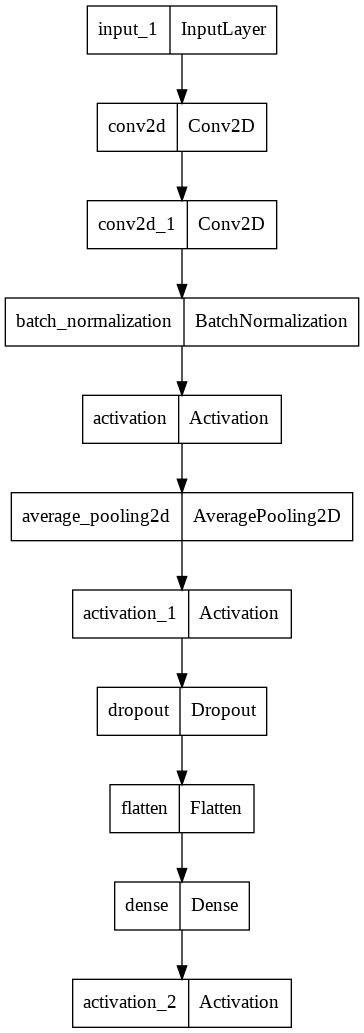

In [ ]:
model=ShallowConvNet(nb_classes=4, Chans = 22, Samples = TrainData.shape[2], dropoutRate = 0.5)
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)


In [ ]:

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
fittedModel = model.fit(TrainData1, TrainLabel1, batch_size = 64, epochs = 300, 
                        validation_data=(ValidData1, ValidLabel1))
                       
                        

Epoch 1/300
6/6 [==============================] - 4s 110ms/step - loss: 1.4928 - accuracy: 0.2176 - val_loss: 2.0630 - val_accuracy: 0.2843
Epoch 2/300
6/6 [==============================] - 0s 20ms/step - loss: 1.3046 - accuracy: 0.3824 - val_loss: 1.6521 - val_accuracy: 0.2549
Epoch 3/300
6/6 [==============================] - 0s 27ms/step - loss: 1.2436 - accuracy: 0.4647 - val_loss: 1.6115 - val_accuracy: 0.2500
Epoch 4/300
6/6 [==============================] - 0s 28ms/step - loss: 1.2058 - accuracy: 0.4471 - val_loss: 1.4863 - val_accuracy: 0.2647
Epoch 5/300
6/6 [==============================] - 0s 20ms/step - loss: 1.1610 - accuracy: 0.5118 - val_loss: 1.4647 - val_accuracy: 0.2598
Epoch 6/300
6/6 [==============================] - 0s 20ms/step - loss: 1.1176 - accuracy: 0.5529 - val_loss: 1.4746 - val_accuracy: 0.2745
Epoch 7/300
6/6 [==============================] - 0s 20ms/step - loss: 1.0593 - accuracy: 0.6324 - val_loss: 1.4609 - val_accuracy: 0.2353
Epoch 8/300
6/6 [==

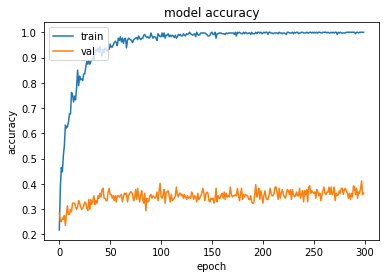

In [ ]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

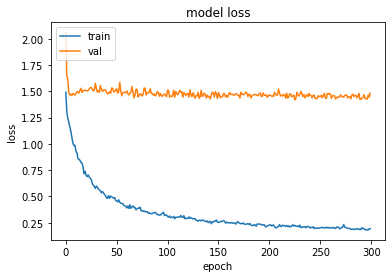

In [ ]:
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(np.mean(fittedModel.history['val_accuracy']))

0.3495261458059152


In [ ]:
model.evaluate(TestData1, TestLabel1)
print(TestData1.shape,TestLabel1.shape)

1/1 [==============================] - 0s 110ms/step - loss: 1.3774 - accuracy: 0.3750
(24, 22, 500, 1) (24, 4)


In [ ]:
predictions = model.predict(TestData1)
pred_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(TestLabel1, axis = 1)
print(pred_classes, actual_classes)


[0 0 0 3 0 2 0 1 1 1 2 3 0 2 1 0 2 2 0 3 3 3 2 0] [0 0 1 1 0 0 0 0 0 0 2 2 0 0 0 0 3 3 3 3 0 0 0 0]


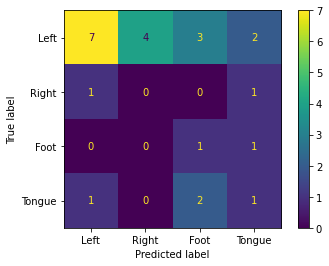

The accuracy is 37.5 %


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(actual_classes, pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Left','Right','Foot','Tongue'])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(actual_classes, pred_classes)
print('The accuracy is',Accuracy*100, '%')